In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
data = pd.read_csv(r'\Users\Ivan\Documents\Daniela\FocaAi\dataset.csv')
data.head()

,average_anger,average_contempt,average_fear,average_disgust,average_happiness,average_neutral,average_sadness,average_surprise,commitment_score
0,0.000423,0.004894,0.0,0.000089,0.000830,0.988057,0.002400,0.003236,0.183673
1,0.008045,0.015705,0.0,0.002115,0.046803,0.764564,0.040862,0.004960,0.269388
2,0.003538,0.013587,0.0,0.000339,0.009933,0.955199,0.014001,0.003112,0.240816
3,0.002684,0.060187,0.0,0.003903,0.020389,0.271250,0.173879,0.006183,0.285714
4,0.002226,0.000588,0.0,0.000356,0.000233,0.922547,0.004795,0.005082,0.204082


In [9]:
#train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])
#test_data = test
# Separate the data into features and targets

target_field = ['commitment_score']
features, target = data.drop(target_field, axis=1), data[target_field]
test_features = test, test_target = test_data.drop(target_field, axis=1), test_data[target_field]

In [17]:
train_features, train_target = features[:3], target[:3]
val_features, val_target = features[3:], target[3:]


In [18]:
val_target

,commitment_score
3,0.285714
4,0.204082
5,0.216327
6,0.261224


In [30]:
class RedeNeural(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        #statistical weigts
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #activation is given by the sigmoid function
        self.activation_function = lambda x: (1 / (1 + np.exp(-x)))
        self.activation_function_prime = lambda x: (x * ( 1 - x))
        
        self.output_activation_function = lambda x: (x)
        self.output_activation_function_prime = lambda x: (1)
        
        
    def train(self, inputs_list, target_list):
        inputs = np.array(inputs_list, ndmin=2).T
        target = np.array(target_list, ndmin=2).T
        
        #hidden layers
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs = self.output_activation_function(final_inputs)
        
        #the cute error function
        error = target - final_outputs
        
        output_errors = error * self.output_activation_function_prime(final_inputs)
        
        #propagated error
        hidden_errors = np.dot(output_errors.T, self.weights_hidden_to_output).T
        hidden_grad = self.activation_function_prime(hidden_outputs)
        
 
        self.weights_hidden_to_output += self.lr * np.dot(output_errors, hidden_outputs.T)
        self.weights_input_to_hidden += self.lr * np.dot((hidden_errors * hidden_grad), inputs.T)
 

     
    def run(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
       
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) 
        final_outputs = self.output_activation_function(final_inputs)
        
        return final_outputs

In [31]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [34]:
import sys

#Bayes
epocas = 1000
learning_rate = 0.05
hidden_nodes = 20
output_nodes = 1

N_i = train_features.shape[1]
rede = RedeNeural(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epocas):
    #ir até o dataset
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.iloc[batch].values, 
                              train_target.iloc[batch]['commitment_score']): rede.train(record, target)
    
    # Printing out the training progress
    train_loss = MSE(rede.run(train_features), train_target['commitment_score'].values)
    val_loss = MSE(rede.run(val_features), val_target['commitment_score'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epocas))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.9% ... Training loss: 0.000 ... Validation loss: 0.005

(-4.613511599079801e-05, 0.1)

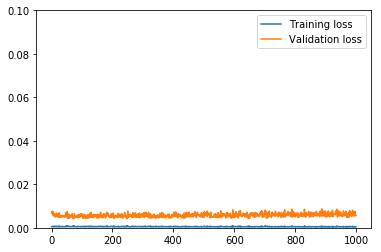

In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=.1)